In [ ]:
# 1. INSTALAR BIBLIOTECAS
print("Instalando ferramentas...")
!pip install roboflow ultralytics > /dev/null

import os
import shutil
import random
import yaml
from ultralytics import YOLO
from roboflow import Roboflow

# 2. BAIXAR O DATASET
print("Baixando imagens...")
rf = Roboflow(api_key="EQ41VaROPljXNeIHhMD2")
project = rf.workspace("jessicaf").project("buracos-no-asfalto")
version = project.version(1)
dataset = version.download("yolov8")

# 3. CORRIGIR A SEPARAÇÃO (PASTA DE VALIDAÇÃO)
print("⏳ Verificando separação das pastas...")
base_path = dataset.location
train_img = f"{base_path}/train/images"
valid_img = f"{base_path}/valid/images"

# Criar pastas se não existirem
os.makedirs(valid_img, exist_ok=True)
os.makedirs(f"{base_path}/valid/labels", exist_ok=True)

# Verificar se precisa mover fotos
qtd_valid = len(os.listdir(valid_img))
if qtd_valid < 10:
    print(f"Pasta de validação vazia. Movendo 15% das fotos...")
    imagens = [f for f in os.listdir(train_img) if f.endswith('.jpg')]
    random.shuffle(imagens)
    num_mover = int(len(imagens) * 0.15)

    for img in imagens[:num_mover]:
        # Mover imagem
        shutil.move(f"{train_img}/{img}", f"{valid_img}/{img}")
        # Mover label correspondente
        lbl = img.replace('.jpg', '.txt')
        lbl_path = f"{base_path}/train/labels/{lbl}"
        if os.path.exists(lbl_path):
            shutil.move(lbl_path, f"{base_path}/valid/labels/{lbl}")
    print(f"✅ Movidos {num_mover} arquivos para validação.")
else:
    print(f"✅ Validação já possui {qtd_valid} imagens. Tudo certo.")

# 4. CONFIGURAR O ARQUIVO DATA.YAML
yaml_path = f"{base_path}/data.yaml"
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

data['train'] = f"{base_path}/train/images"
data['val'] = f"{base_path}/valid/images"
data['test'] = None

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

# 5. TREINAR O MODELO
print("INICIANDO TREINO FINAL...")
model = YOLO('yolov8n.pt')
results = model.train(data=yaml_path, epochs=25, imgsz=640)


Instalando ferramentas...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Baixando imagens...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Buracos-no-Asfalto-1 in yolov8:: 100%|██████████| 360/360 [00:00<00:00, 6466.43it/s]


⏳ Verificando separação das pastas...
Pasta de validação vazia. Movendo 15% das fotos...
✅ Movidos 26 arquivos para validação.
INICIANDO TREINO FINAL...
Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Buracos-no-Asfalto-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, mom

Preparando para gerar as imagens do portfólio...
Usando o modelo da pasta: train
Testando em 3 imagens que a IA nunca viu...

--- Imagem 1 ---

image 1/1 /content/Buracos-no-Asfalto-1/valid/images/image-8-_jpeg.rf.f3b4c409bbc634761a8f78930c6ccde5.jpg: 640x640 3 buracos, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


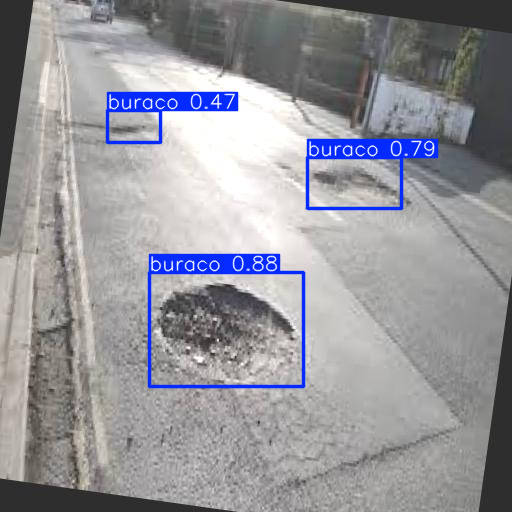



--- Imagem 2 ---

image 1/1 /content/Buracos-no-Asfalto-1/valid/images/JFDfyZHVboK2S4wWxGBToc3essg_webp.rf.ed7bde75e642ee0446c9a4d6de4dc19c.jpg: 640x640 1 buraco, 8.4ms
Speed: 8.8ms preprocess, 8.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


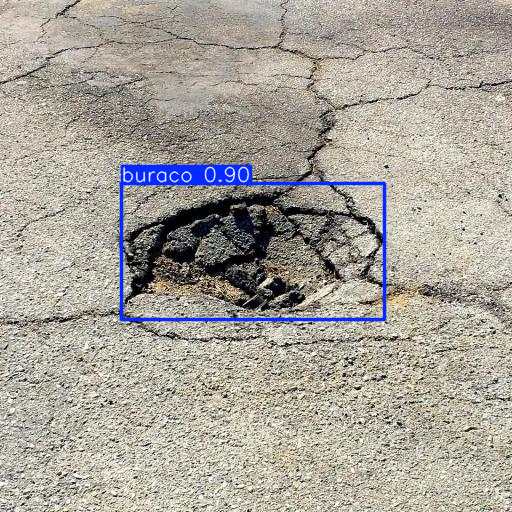



--- Imagem 3 ---

image 1/1 /content/Buracos-no-Asfalto-1/valid/images/road-damage-with-pothole-revealing-cobblestones-un-SSBPTJR_jpg.rf.215fe98699ed85f00af9bbd92f8ef113.jpg: 640x640 1 buraco, 9.2ms
Speed: 3.7ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


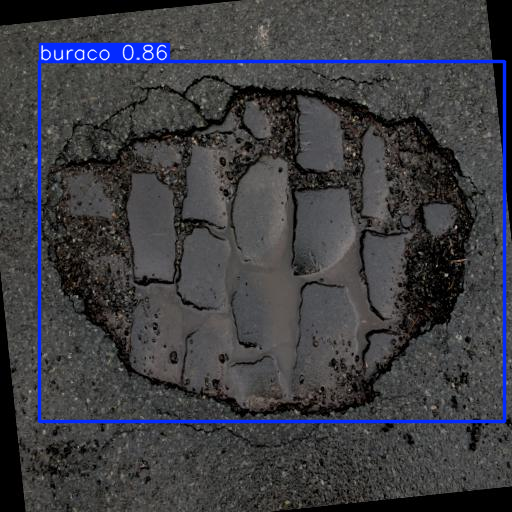

In [ ]:
from ultralytics import YOLO
import glob
import os
from IPython.display import display
import PIL.Image

print("Preparando para gerar as imagens do portfólio...")

# --- 1. Achar o modelo mais recente automaticamente ---
# Procura a última pasta 'train' criada dentro de runs/detect
pasta_runs = 'runs/detect'
pastas_train = [d for d in os.listdir(pasta_runs) if d.startswith('train')]
# Ordena para achar a mais nova (train, train2, train3...)
pastas_train.sort(key=lambda x: int(x.replace('train', '')) if x.replace('train', '') else 0, reverse=True)
ultima_pasta_train = pastas_train[0]
caminho_modelo = f"{pasta_runs}/{ultima_pasta_train}/weights/best.pt"

print(f"Usando o modelo da pasta: {ultima_pasta_train}")
model = YOLO(caminho_modelo)

# --- 2. Achar as imagens de "prova" (Validação) ---
# (Usa o local do dataset que já estava definido na memória)
pasta_validacao = f"{dataset.location}/valid/images"
# Pega 3 imagens aleatórias (ou as primeiras 3) da pasta
imagens_para_teste = glob.glob(f"{pasta_validacao}/*.jpg")[:3]

if not imagens_para_teste:
     # Tenta pegar png se não tiver jpg
    imagens_para_teste = glob.glob(f"{pasta_validacao}/*.png")[:3]

print(f"Testando em {len(imagens_para_teste)} imagens que a IA nunca viu...\n")

# --- 3. Gerar e mostrar as imagens ---
for i, caminho_imagem in enumerate(imagens_para_teste):
    print(f"--- Imagem {i+1} ---")
    # Roda a predição (conf=0.30: mostra só se tiver mais de 30% de certeza)
    # save=True vai salvar uma cópia na pasta runs também
    results = model.predict(caminho_imagem, conf=0.30, save=True)

    # Mostra a imagem aqui no notebook
    for r in results:
        im_array = r.plot() # Desenha as caixas
        im = PIL.Image.fromarray(im_array[..., ::-1]) # Converte as cores para exibir
        display(im)
    print("\n")



In [ ]:
from ultralytics import YOLO
import os

# --- CONFIGURAÇÃO ----
buraco_video = "buraco_video.mp4"

# ---- Encontrar o melhor modelo ---
pasta_runs = 'runs/detect'
pastas_train = [d for d in os.listdir(pasta_runs) if d.startswith('train')]
pastas_train.sort(key=lambda x: int(x.replace('train', '')) if x.replace('train', '') else 0, reverse =True)
ultima_pasta = pastas_train[0]
caminho_modelo = f"{pasta_runs}/{ultima_pasta}/weights/best.pt"

print(f"Carregando a IA da pasta: {ultima_pasta}")
model = YOLO(caminho_modelo)

# --- Processar o Video ---
print(f"Iniciando processamento do video: {buraco_video}...")
print("Isso pode demorar um pouco. Aguarde...")

# --- Criando novo caminho, apenas se tiver 25% de certeza
results = model.predict(source=buraco_video, conf=0.25, save=True)

print("\n VIDEO PRONTO!")
print("O video com as marcações foi salvo em 'run/detect/predict...'")


Carregando a IA da pasta: train
Iniciando processamento do video: buraco_video.mp4...
Isso pode demorar um pouco. Aguarde...

WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/427) /content/buraco_video.mp4: 640x384 1 buraco, 146.8ms
video 1/1 (frame 2/427) /content/buraco_video.mp4: 640x384 1 buraco, 26.0ms
video 1/1 (frame 3/427) /content/buraco_video.mp4: 640x384 1 buraco, 8.9ms
video 1/1 (frame 4/427) /content/buraco_video.mp4: 640x384 1 buraco, 8.6ms
video 1/1 (frame 5/427) /conte